In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('/Users/sarahamiraslani/Downloads/US Superstore data.xls')

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.shape

In [3]:
# shorten data 
small_df = pd.DataFrame(df,columns = ['Order ID','Order Date','Product ID','Ship Mode',
                                      'Segment','Country','State','Region','Category',
                                      'Sub-Category','Sales','Quantity','Discount', 'Profit'])

In [4]:
small_df.head()

,Order ID,Order Date,Product ID,Ship Mode,Segment,Country,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,FUR-BO-10001798,Second Class,Consumer,United States,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,FUR-CH-10000454,Second Class,Consumer,United States,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,OFF-LA-10000240,Second Class,Corporate,United States,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,FUR-TA-10000577,Standard Class,Consumer,United States,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,OFF-ST-10000760,Standard Class,Consumer,United States,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Pivot Tables

In [5]:
# by default, pivot_table calculates the mean for all the numeric columns 
pivot_table = pd.pivot_table(small_df,index=['Region','Segment'])
pivot_table

Discount     Profit  Quantity       Sales
Region  Segment                                               
Central Consumer     0.252030   7.066046  3.728548  207.946728
        Corporate    0.239822  27.791831  3.869242  234.763466
        Home Office  0.208858  28.398202  3.783105  208.248046
East    Consumer     0.147447  28.040153  3.639891  238.875539
        Corporate    0.144356  26.935666  3.828962  228.516929
        Home Office  0.141036  53.205611  3.810757  253.911805
South   Consumer     0.142124  32.116435  3.792363  233.390180
        Corporate    0.157745  29.833771  3.952941  238.992025
        Home Office  0.143382  16.987626  3.731618  272.996329
West    Consumer     0.107506  34.360409  3.873804  217.033955
        Corporate    0.113958  35.872323  3.781250  235.265911
        Home Office  0.106918  28.949939  3.781086  239.442692

Note that we can perform other mathematical aggregations like sum by passing them as a list to the *aggfunc* parameter. 

In [14]:
pivot_table_2 = pd.pivot_table(small_df,index=['Region','Segment'],aggfunc=['mean','sum'])
pivot_table_2

mean                                       sum  \
                     Discount     Profit  Quantity       Sales Discount   
Region  Segment                                                           
Central Consumer     0.252030   7.066046  3.728548  207.946728   305.46   
        Corporate    0.239822  27.791831  3.869242  234.763466   161.40   
        Home Office  0.208858  28.398202  3.783105  208.248046    91.48   
East    Consumer     0.147447  28.040153  3.639891  238.875539   216.60   
        Corporate    0.144356  26.935666  3.828962  228.516929   126.60   
        Home Office  0.141036  53.205611  3.810757  253.911805    70.80   
South   Consumer     0.142124  32.116435  3.792363  233.390180   119.10   
        Corporate    0.157745  29.833771  3.952941  238.992025    80.45   
        Home Office  0.143382  16.987626  3.731618  272.996329    39.00   
West    Consumer     0.107506  34.360409  3.873804  217.033955   179.75   
        Corporate    0.113958  35.872323  3.781250  235.265911   109.40   
        Home Office  0.106918  28.949939  3.781086  239.442692    61.05   

                                                       
                         Profit Quantity        Sales  
Region  Segment                                        
Central Consumer      8564.0481     4519  252031.4340  
        Corporate    18703.9020     2604  157995.8128  
        Home Office  12438.4124     1657   91212.6440  
East    Consumer     41190.9843     5347  350908.1670  
        Corporate    23622.5789     3358  200409.3470  
        Home Office  26709.2168     1913  127463.7260  
South   Consumer     26913.5728     3178  195580.9710  
        Corporate    15215.2232     2016  121885.9325  
        Home Office   4620.6343     1015   74255.0015  
West    Consumer     57450.6040     6477  362880.7730  
        Corporate    34437.4299     3630  225855.2745  
        Home Office  16530.4150     2159  136721.7770

In [10]:
pivot_table.reset_index(inplace=True)
pivot_table

,Region,Segment,Discount,Profit,Quantity,Sales
0,Central,Consumer,0.252030,7.066046,3.728548,207.946728
1,Central,Corporate,0.239822,27.791831,3.869242,234.763466
2,Central,Home Office,0.208858,28.398202,3.783105,208.248046
3,East,Consumer,0.147447,28.040153,3.639891,238.875539
4,East,Corporate,0.144356,26.935666,3.828962,228.516929
5,East,Home Office,0.141036,53.205611,3.810757,253.911805
6,South,Consumer,0.142124,32.116435,3.792363,233.390180
7,South,Corporate,0.157745,29.833771,3.952941,238.992025
8,South,Home Office,0.143382,16.987626,3.731618,272.996329
9,West,Consumer,0.107506,34.360409,3.873804,217.033955


In [12]:
pivot_table.sort_values('Profit',ascending=False).reset_index()

,index,Region,Segment,Discount,Profit,Quantity,Sales
0,5,East,Home Office,0.141036,53.205611,3.810757,253.911805
1,10,West,Corporate,0.113958,35.872323,3.781250,235.265911
2,9,West,Consumer,0.107506,34.360409,3.873804,217.033955
3,6,South,Consumer,0.142124,32.116435,3.792363,233.390180
4,7,South,Corporate,0.157745,29.833771,3.952941,238.992025
5,11,West,Home Office,0.106918,28.949939,3.781086,239.442692
6,2,Central,Home Office,0.208858,28.398202,3.783105,208.248046
7,3,East,Consumer,0.147447,28.040153,3.639891,238.875539
8,1,Central,Corporate,0.239822,27.791831,3.869242,234.763466
9,4,East,Corporate,0.144356,26.935666,3.828962,228.516929


**Data Shape - Long Data or Wide Data**

- Vertical or Long data 
    - each row represents one observation and each column is considered a variable 

## Melt
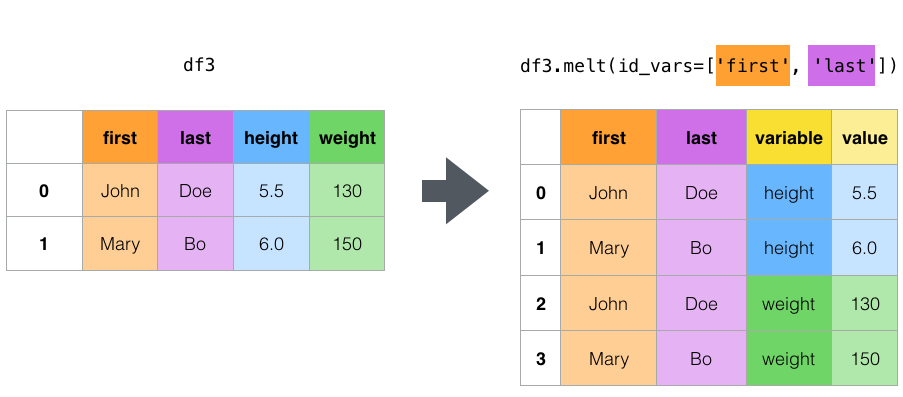

In [16]:
pivot_table.melt(id_vars=['Region','Segment'])

,Region,Segment,variable,value
0,Central,Consumer,Discount,0.252030
1,Central,Corporate,Discount,0.239822
2,Central,Home Office,Discount,0.208858
3,East,Consumer,Discount,0.147447
4,East,Corporate,Discount,0.144356
5,East,Home Office,Discount,0.141036
6,South,Consumer,Discount,0.142124
7,South,Corporate,Discount,0.157745
8,South,Home Office,Discount,0.143382
9,West,Consumer,Discount,0.107506


**Unstack**

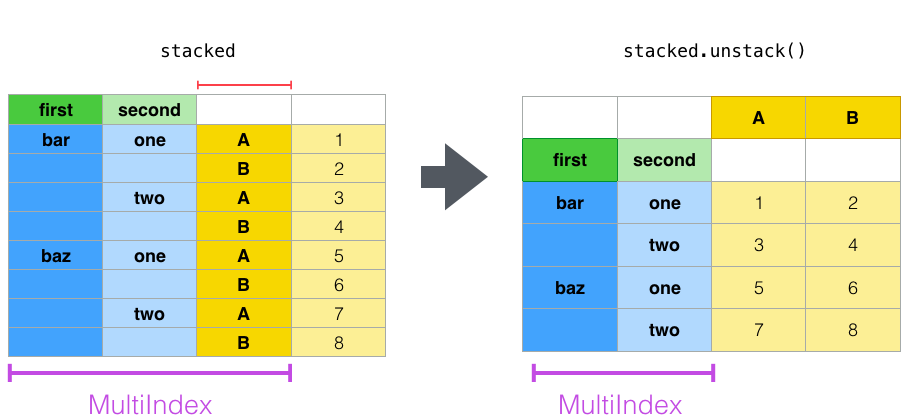
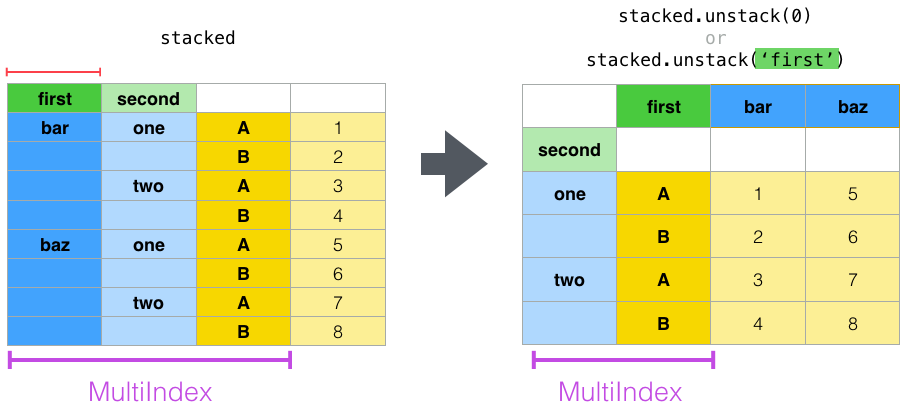
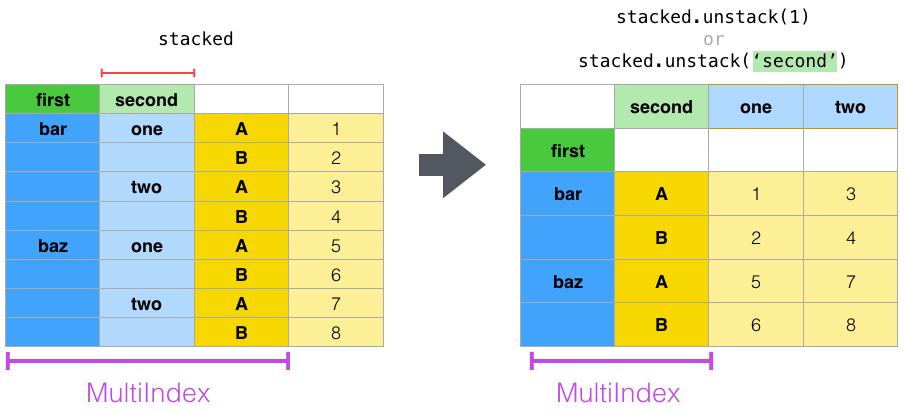

In [20]:
pivot_table = pd.pivot_table(small_df,index=['Region','Segment'])
unstacked_df = pivot_table.unstack()

**Stack**
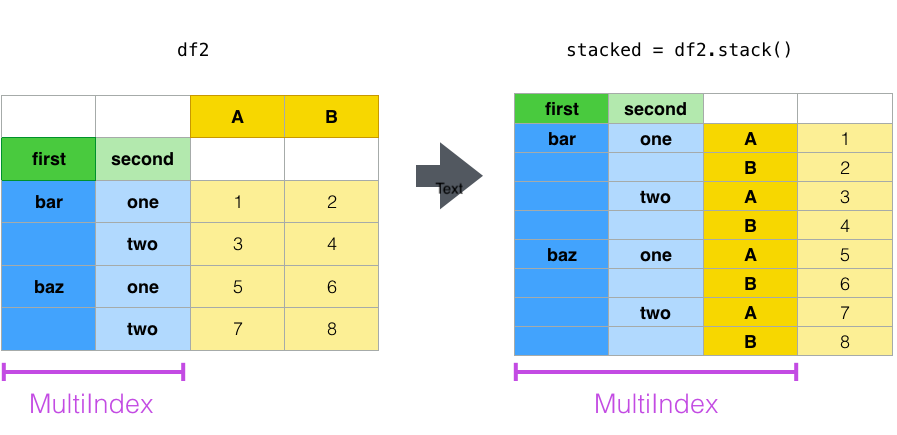

In [22]:
stacked_df = unstacked_df.stack()
stacked_df

Discount     Profit  Quantity       Sales
Region  Segment                                               
Central Consumer     0.252030   7.066046  3.728548  207.946728
        Corporate    0.239822  27.791831  3.869242  234.763466
        Home Office  0.208858  28.398202  3.783105  208.248046
East    Consumer     0.147447  28.040153  3.639891  238.875539
        Corporate    0.144356  26.935666  3.828962  228.516929
        Home Office  0.141036  53.205611  3.810757  253.911805
South   Consumer     0.142124  32.116435  3.792363  233.390180
        Corporate    0.157745  29.833771  3.952941  238.992025
        Home Office  0.143382  16.987626  3.731618  272.996329
West    Consumer     0.107506  34.360409  3.873804  217.033955
        Corporate    0.113958  35.872323  3.781250  235.265911
        Home Office  0.106918  28.949939  3.781086  239.442692

**Pivot**
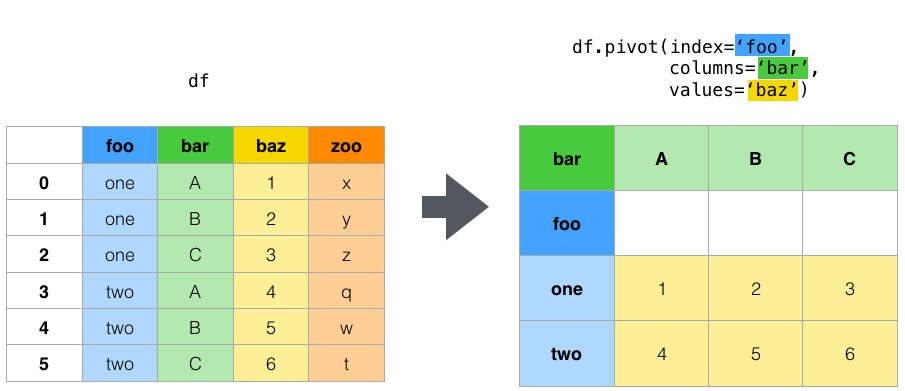
Note: before calling pivot we need to ensure that our data does not have rows with duplicate values for the specified columns 

Resources: 
- https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
- https://towardsdatascience.com/reshaping-data-with-pandas-19156e8b7af3